# Numerische Methoden für Systeme

### 1.3 Verständnisfragen

1. Was verstehen Sie unter einem konservativen numerischen Verfahren?

Ein Verfahren das die physikalischen Gesetze erhält. Also ein z.B ein Impuls, eine Masse oder Energie bleibt erhalten.

2. Das klassische Runge-Kutta-Verfahren ist ”nahezu” konservativ. Was bedeutet das? Worauf müssen Sie achten,
wenn Sie das Runge-Kutta-Verfahren für die Lösung von Stabilitätsproblemen einsetzen wollen.

Die Eigenschaften bleiben nicht exakt erhalten. -> Es kann zu kleinen Fehlern kommen. z.B bei langen integrationszeiten oder speziellen differentialgleichungen.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter
p       = 1.184  # kg/m^3
Ca      = 0.45  # constant
Rkugel  = 0.1   # m
m       = 0.05  # kg
g       = 9.81  # m/s^2
ks      = 0.05  # N/m
v0      = 0.0     # m/s
k       = 0.5 * Ca * p * np.pi * Rkugel**2 
print(k)

0.00836920282916321


### 1.4 Aufgaben


### 1. Differentialgleichung und Anfangswertproblem

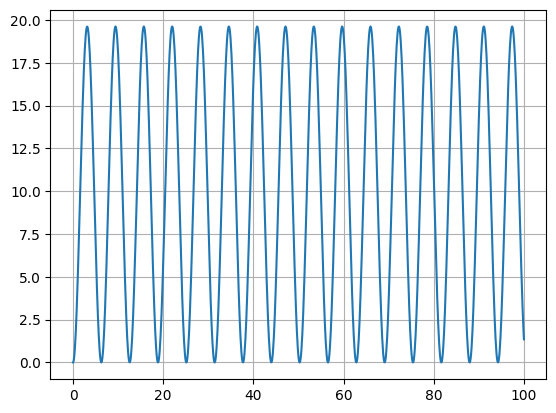

In [2]:

def model1(x):
    x0 = x[0] # dx
    x1 = x[1] # x
    return np.array([x0,  -(k/m)*(x0+v0)*np.abs(x0+v0) - ((ks*x1)/m) + g])

def model1_analytisch(x):
    x = (m*g/ks) * (1-np.cos(np.sqrt(ks/m)*x))
    dx = np.sqrt(m/ks)*g * np.sin(np.sqrt(ks/m)*x)
    return x, dx
    

tdata_model = np.linspace(0, 100, 1000)
plt.plot(tdata_model, model1_analytisch(tdata_model)[0], label='Analytisch')
plt.grid()
plt.show()

### 2. gDgln lösen mit RK4 Verfahren

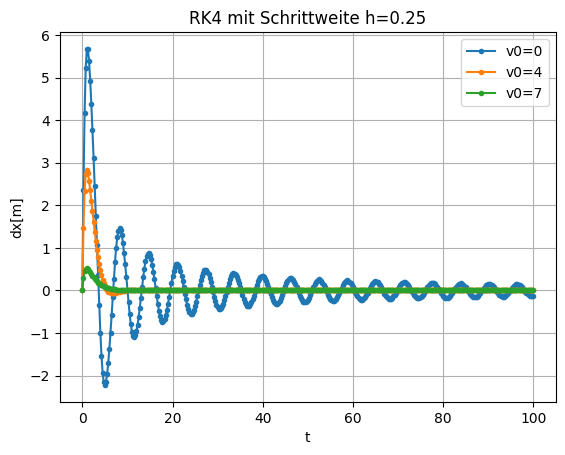

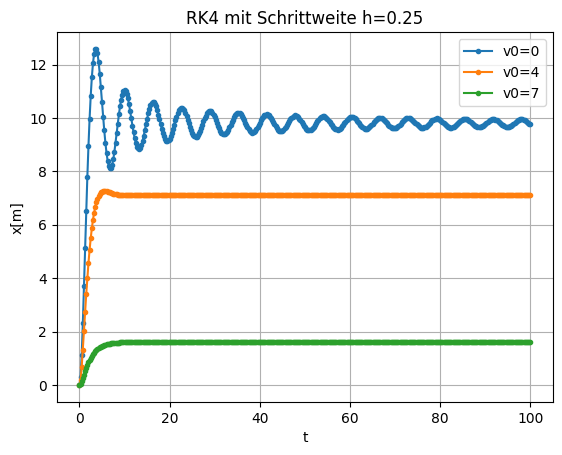

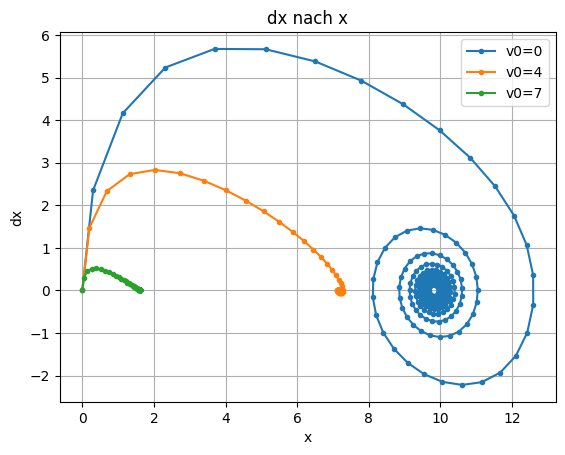

In [3]:
# Verfahren Runge-Kutta-Verfahren (RK4) (für ein autonomes System)
# Eine zweite Lösung für das RK4-Verfahren.

def runga_kutta_RK4_2Systeme(x0, h, tend, f):
    # x0: Anfangswerte
    # y0: Anfangswerte
    # tend: Zeit bis zum Ende
    # h: Schrittweite
    # f: Funktion mit n Gleichungen
    
    N = int(tend / h) +1

    # Vektor mit dx-daten und x-daten
    x = np.zeros((N, np.shape(x0)[0]))

    # Zeitvektor
    t = np.zeros((N))
    
    x[0][0] = x0[0]
    x[0][1] = x0[1]

    for i in range(1, N):
        t[i] = t[i-1] + h

        k1 = f(t[i], x[i-1,:])
        k2 = f(t[i], [x[i-1,0] + 0.5*h*k1[1], x[i-1, 1] + 0.5*h*k1[0]])
        k3 = f(t[i], [x[i-1,0] + 0.5*h*k2[1], x[i-1, 1] + 0.5*h*k2[0]])
        k4 = f(t[i], [x[i-1,0] + h*k3[1],     x[i-1, 1] + h*k3[0]])

        x[i, 0] = x[i-1, 0] + h*((1/6)*k1[1] + (1/3)*k2[1] + (1/3)*k3[1] + (1/6)*k4[1]) #dx
        x[i, 1] = x[i-1, 1] + h*((1/6)*k1[0] + (1/3)*k2[0] + (1/3)*k3[0] + (1/6)*k4[0]) #x

    return x, t


def model1(t, x):
    x0 = x[0] # dx
    x1 = x[1] # x
    return np.array([x0,  -(k/m)*(x0+v0)*np.abs(x0+v0) - ((ks*x1)/m) + g])

x0 = (0, 0)
tend = 100
h = 0.25

v0 = 0.0
v0_x, t = runga_kutta_RK4_2Systeme(x0, h, tend, model1)
v0 = 4.0
v4_x, t = runga_kutta_RK4_2Systeme(x0, h, tend, model1)
v0 = 7.0
v7_x, t = runga_kutta_RK4_2Systeme(x0, h, tend, model1)

# =================== Plot erstellen ===================
plt.figure(2)
plt.plot(t, v0_x[:,0],  '.-', label='v0=0')
plt.plot(t, v4_x[:,0],  '.-', label='v0=4')
plt.plot(t, v7_x[:,0],  '.-', label='v0=7')
plt.ylabel('dx[m]')
plt.xlabel('t')
plt.title('RK4 mit Schrittweite h=0.25')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(3)
plt.plot(t, v0_x[:, 1],  '.-', label='v0=0')
plt.plot(t, v4_x[:, 1],  '.-', label='v0=4')
plt.plot(t, v7_x[:, 1],  '.-', label='v0=7')
plt.ylabel('x[m]')
plt.xlabel('t')
plt.title('RK4 mit Schrittweite h=0.25')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(4)
plt.plot(v0_x[:, 1], v0_x[:, 0],  '.-', label='v0=0')
plt.plot(v4_x[:, 1], v4_x[:, 0],  '.-', label='v0=4')
plt.plot(v7_x[:, 1], v7_x[:, 0],  '.-', label='v0=7')
plt.ylabel('dx')
plt.xlabel('x')
plt.title('dx nach x')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# zweite (evt. einfachere) Lösung für RK4
 
v0 = np.array([0, 4, np.sqrt(ks*m)/k, 7, np.sqrt(m*g/k)])  #m/s
 
def f(t, x,v):
    return np.array([x[1], -(1/m) * np.sign(x[1]+v) * k * (x[1]+v)**2 -(1/m)*ks*x[0]+g])
 
def RK4(t0,x0,h,tend,f,v ):
    N = int((tend - t0) / h)
    t = np.zeros(N+1)
    x = np.zeros((N+1,np.shape(x0)[0]))
    
    t[0] = t0
    x[0,:] = x0
    for i in range(1, N+1):
        t[i] = t[i-1] + h

        k1 = f(t[i-1], x[i-1,:], v)
        k2 = f(t[i-1] + 0.5*h, x[i-1,:] + 0.5*h*k1, v)
        k3 = f(t[i-1] + 0.5*h, x[i-1,:] + 0.5*h*k2, v)
        k4 = f(t[i-1] + h, x[i-1,:] + h*k3, v)
        x[i,:] = x[i-1,:] + h*(k1 + 2*k2 + 2*k3 + k4)/6
    return t, x

#print(v0[4])
t, x0 = RK4(0, np.array([0,0]), 0.25, 100, f, v0[0])

#plt.figure(3)
#plt.plot(t,x0,  'o-', label='v0=0')
#plt.plot(x0[:,0],x0[:,1],  'o-', label='v0=0')
#plt.ylabel('x[m]')
#plt.xlabel('t')
#plt.title('RK4 mit Schrittweite h=0.25')
#plt.legend()
#plt.grid(True)
#plt.show()

### 3. Optional

### 4. gDgln lösen mit Impliziten Mittelpunktregel

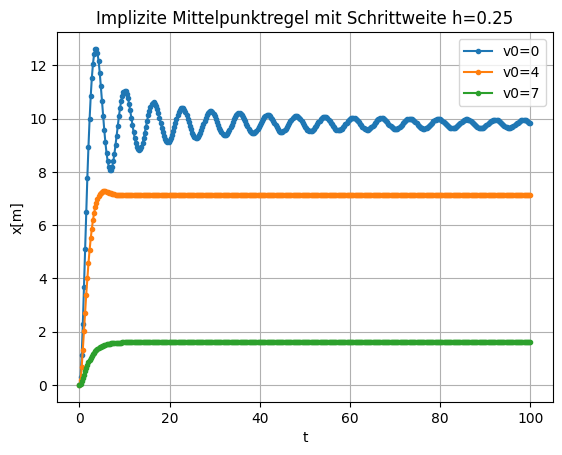

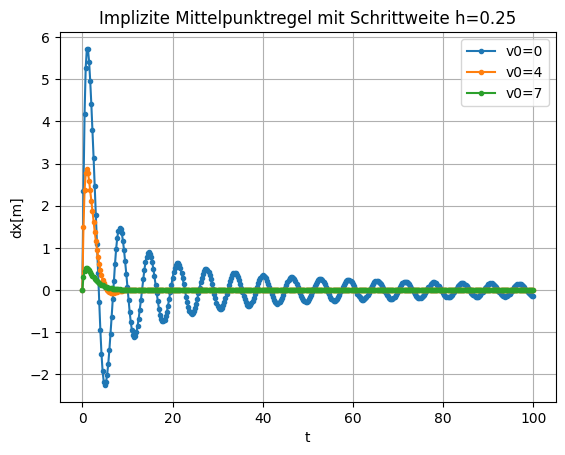

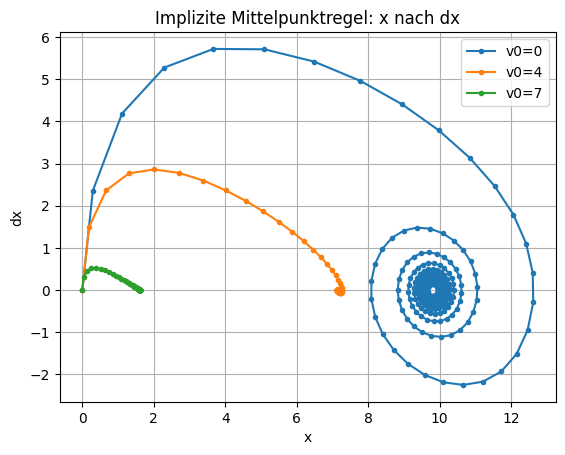

In [5]:
# C | A  =  1/2 | 1/2
#   | B  =      | 1
def runga_kutta_RK4_2Systeme_implizit(x0, h, tend, f, df, tol):
    # x0: Startpunkt
    # X: Endpunkt
    # f: Funktion
    # df: Jacobi Matrix der Funktion f
    # N: Anzahl der Schritte
    # tol: Toleranz
    max_iter=20

    N = int(tend / h)+1
    t = np.zeros(N)
    x = np.zeros((N,np.shape(x0)[0]))
   
    x[0,:] = x0
    k = f(t[0], x[0,:])

    for i in range(1,N):
        step = 0
        t[i] = t[i-1] + h

        r = k - f(x[i-1], x[i-1] + (h*0.5*k))
        J = -df(t[i-1] + h*0.5, x[i-1] + (h*k*0.5))
        # einheitsmatrix:
        I2 = np.eye(2)
        M = I2 - h * 0.5 * J


        while (np.abs(r[0]) > tol or np.abs(r[1]) > tol) and step < max_iter :
            # Solve linear system with LR
            b = -r
            ATA = np.dot(M.T, M)
            ATb = np.dot(M.T, b)
            delta_k = np.linalg.solve(ATA, ATb)
            k = k + delta_k
            r = k - f(t[i-1] + h*0.5, x[i-1] + (h*k*0.5))
            step += 1

        x[i,:] = x[i-1,:] + h*k
       
    return x, t


def model1(t, x):
    x1 = x[0] # x
    x0 = x[1] # dx
    return np.array([x0,  -(k/m)*(x0+v0)*np.abs(x0+v0) - ((ks*x1)/m) + g])



def model1_df(t, x):
    x0 = x[0] # dx
    x1 = x[1] # x
    return np.array([[0, 1], 
                    [-ks/m, -(k/m)*2*np.abs(x0)]])

# Anfangswerte, Endzeitpunkt und Schrittweite einstellen
x0 = (0, 0)
tend = 100
h = 0.25

v0 = 0.0
v0_x, t = runga_kutta_RK4_2Systeme_implizit(x0, h, tend, model1, model1_df, 1e-3)
v0 = 4.0
v4_x, t = runga_kutta_RK4_2Systeme_implizit(x0, h, tend, model1, model1_df, 1e-3)
v0 = 7.0
v7_x, t = runga_kutta_RK4_2Systeme_implizit(x0, h, tend, model1, model1_df, 1e-3)

# =================== Plot erstellen ===================

plt.figure(5)
plt.plot(t, v0_x[:,0],  '.-', label='v0=0')
plt.plot(t, v4_x[:,0],  '.-', label='v0=4')
plt.plot(t, v7_x[:,0],  '.-', label='v0=7')
plt.ylabel('x[m]')
plt.xlabel('t')
plt.title('Implizite Mittelpunktregel mit Schrittweite h=0.25')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(6)
plt.plot(t, v0_x[:,1],  '.-', label='v0=0')
plt.plot(t, v4_x[:,1],  '.-', label='v0=4')
plt.plot(t, v7_x[:,1],  '.-', label='v0=7')
plt.ylabel('dx[m]')
plt.xlabel('t')
plt.title('Implizite Mittelpunktregel mit Schrittweite h=0.25')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(7)
plt.plot(v0_x[:,0], v0_x[:,1],  '.-', label='v0=0')
plt.plot(v4_x[:,0], v4_x[:,1],  '.-', label='v0=4')
plt.plot(v7_x[:,0], v7_x[:,1],  '.-', label='v0=7')
plt.ylabel('dx')
plt.xlabel('x')
plt.title('Implizite Mittelpunktregel: x nach dx')
plt.legend()
plt.grid(True)
plt.show()

### 5. Vergleichen der Numerischen Lösungen

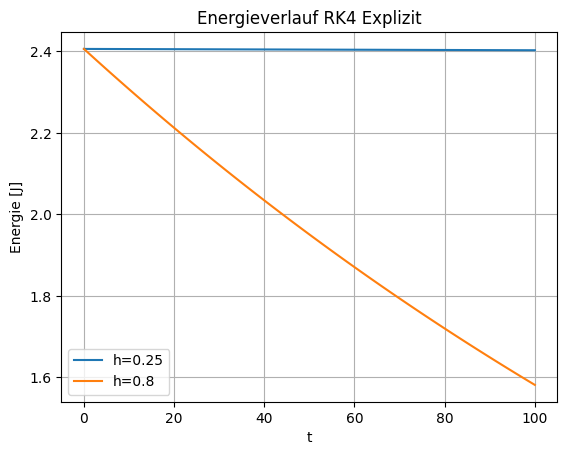

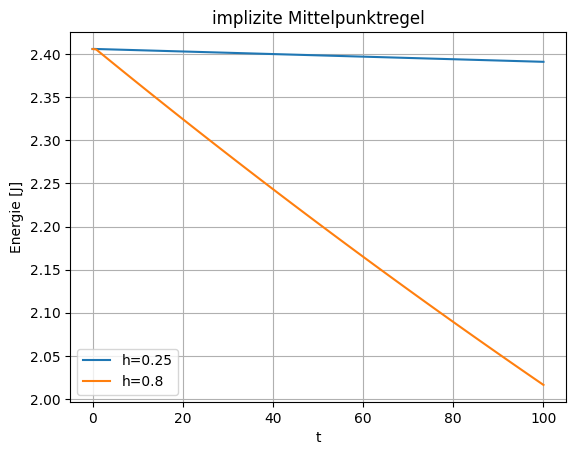

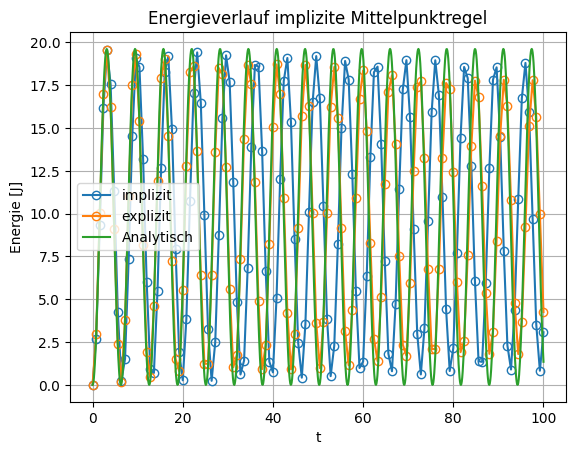

In [6]:
# Parameter
p       = 1.184  # kg/m^3
Ca      = 0.45  # constant
Rkugel  = 0.1   # m
m       = 0.05  # kg
g       = 9.81  # m/s^2
ks      = 0.05  # N/m
v0      = 0.0     # m/s
k       = 0.5 * Ca * p * np.pi * Rkugel**2 

def energie(x):
    #print(x)
    x1 = x[0] # dx
    x0 = x[1] # x
    return 0.5*ks*(x0-((m*g)/ks))**2 + 0.5*m*x1**2

def calc_energy(data):
    e = []
    for i in range(len(data)):
        x = data[i]
        x1 = x[0] # dx
        x0 = x[1] # x
        calc = 0.5*ks*(x0-((m*g)/ks))**2 + 0.5*m*x1**2
        e.append(calc)
    return e

def calc_energy2(data):
    e = []
    for i in range(len(data)):
        x = data[i]
        x0 = x[0] # dx
        x1 = x[1] # x
        calc = 0.5*ks*(x0-((m*g)/ks))**2 + 0.5*m*x1**2
        e.append(calc)
    return e

x0 = (0, 0)
tend = 100
v0 = 0.0
k = 0

def model1(t, x):
    x1 = x[0] # dx
    x0 = x[1] # x
    return np.array([x0,  -(k/m)*(x0+v0)*np.abs(x0+v0) - ((ks*x1)/m) + g])


h = 0.25
x_imp_25, t_imp_25 = runga_kutta_RK4_2Systeme_implizit(x0, h, tend, model1, model1_df, 1e-3)
h = 0.8
x_imp_8, t_imp_8 = runga_kutta_RK4_2Systeme_implizit(x0, h, tend, model1, model1_df, 1e-3)

def model1(t, x):
    x0 = x[0] # dx
    x1 = x[1] # x
    return np.array([x0,  -(k/m)*(x0+v0)*np.abs(x0+v0) - ((ks*x1)/m) + g])

h = 0.25
x_exp_25, t_exp_25 = runga_kutta_RK4_2Systeme(x0, h, tend, model1)
h = 0.8
x_exp_8, t_exp_8 = runga_kutta_RK4_2Systeme(x0, h, tend, model1)


e_imp_25 = calc_energy2(x_imp_25)
e_exp_25 = calc_energy(x_exp_25)

e_imp_8 = calc_energy2(x_imp_8)
e_exp_8 = calc_energy(x_exp_8)
   
# =================== Plot erstellen ===================
plt.figure(8)
plt.plot(t_exp_25, e_exp_25,  '-', label='h=0.25', markerfacecolor='none')
plt.plot(t_exp_8, e_exp_8,  '-', label='h=0.8', markerfacecolor='none')
plt.ylabel('Energie [J]')
plt.xlabel('t')
plt.title('Energieverlauf RK4 Explizit')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(9)
plt.plot(t_imp_25, e_imp_25,  '-', label='h=0.25', markerfacecolor='none')
plt.plot(t_imp_8, e_imp_8,  '-', label='h=0.8', markerfacecolor='none')
plt.ylabel('Energie [J]')
plt.xlabel('t')
plt.title('implizite Mittelpunktregel')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(10)
plt.plot(t_imp_8, x_imp_8[:, 0],  'o-', label='implizit', markerfacecolor='none')
plt.plot(t_exp_8, x_exp_8[:, 1],  'o-', label='explizit', markerfacecolor='none')
plt.plot(tdata_model, model1_analytisch(tdata_model)[0], label='Analytisch')
plt.ylabel('Energie [J]')
plt.xlabel('t')
plt.title('Energieverlauf implizite Mittelpunktregel')
plt.legend()
plt.grid(True)
plt.show()